In [1]:
!mlflow --version

mlflow, version 2.2.2


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss,RocCurveDisplay,ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [3]:
#Load Data

def load_data(url):
    data=pd.read_csv(url,sep=',')
    return data
    

In [4]:
#split data

def train_test_split(final_data,target_column):
    from sklearn.model_selection import train_test_split
    X=final_data.loc[:,final_data.columns!=target_column]
    y=final_data.loc[:,final_data.columns==target_column]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=47)
    return X_train,X_test,y_train,y_test


In [5]:
# train basic classifier

def training_basic_classifier(X_train,y_train):
    classifier = LogisticRegression(max_iter=500)
    classifier.fit(X_train,y_train)

    return classifier

In [6]:
def predict_on_test_data(model,X_test):
    y_pred=model.predict(X_test)
    return y_pred

In [7]:
def predict_prob_on_test_data(model,X_test):
    y_pred_prb=model.predict_proba(X_test)
    return y_pred_prb

In [8]:
def get_metrics(y_true,y_pred,y_pred_prb):
    acc= accuracy_score(y_true,y_pred)
    prec= precision_score(y_true,y_pred,average='micro')
    recall= recall_score(y_true,y_pred,average='micro')
    entropy=log_loss(y_true,y_pred_prb)
    return {'accuracy':round(acc,2),'precision':round(prec,2),'recall':round(recall,2),'entropy':round(entropy,2)}
    

In [9]:
def create_roc_auc(clf,X_data,y_data):
    RocCurveDisplay.from_estimator(clf,X_data,y_data)
    plt.savefig('roc_auc_curve.png')

In [10]:
def create_confusion_matrix(clf,X_test,y_test):
    ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test)
    plt.savefig('ConfusionMatrix.png')

In [11]:
### Function calls

In [12]:
#Data load

url='/home/harish/Documents/MLops/iris.csv'
data= load_data(url)
data.head()


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [14]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['class']=le.fit_transform(data['class'])


In [15]:
#split the data

target_column='class'
X_train,X_test,y_train,y_test = train_test_split(data,target_column)

In [16]:
X_test.head()

,sepal-length,sepal-width,petal-length,petal-width
26,5.0,3.4,1.6,0.4
41,4.5,2.3,1.3,0.3
49,5.0,3.3,1.4,0.2
44,5.1,3.8,1.9,0.4
141,6.9,3.1,5.1,2.3


In [17]:
y_train.head()

,class
25,0
30,0
74,1
29,0
135,2


In [18]:
# TRAINING THE BASIC CLASSIFIER

In [19]:
model = training_basic_classifier(X_train,y_train)

/home/harish/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
y_pred=predict_on_test_data(model,X_test)
print(y_pred)


[0 0 0 0 2 2 1 2 1 1 2 1 2 0 0 2 0 1 1 1 1 2 2 0 0 2 1 0 1 2 0 2 0 0 0 0 2
 2 2 1 1 2 2 1 1]


In [21]:
y_pred_prb = predict_prob_on_test_data(model,X_test)

In [22]:
print(y_pred_prb)

[[9.60740490e-01 3.92585123e-02 9.97718014e-07]
 [9.34942801e-01 6.50566003e-02 5.99143211e-07]
 [9.71021648e-01 2.89780934e-02 2.58630894e-07]
 [9.54908454e-01 4.50890652e-02 2.48114080e-06]
 [1.74070641e-04 1.08160301e-01 8.91665629e-01]
 [1.57978157e-05 8.13870365e-02 9.18597166e-01]
 [3.55155886e-03 7.13379272e-01 2.83069169e-01]
 [4.28623284e-04 1.90766355e-01 8.08805021e-01]
 [8.28608183e-03 8.65200953e-01 1.26512965e-01]
 [1.94227532e-02 8.41281047e-01 1.39296200e-01]
 [2.90591935e-05 4.04973046e-02 9.59473636e-01]
 [7.73702043e-03 8.63088176e-01 1.29174804e-01]
 [7.40210135e-04 3.66411887e-01 6.32847902e-01]
 [9.67717915e-01 3.22817386e-02 3.46308363e-07]
 [9.77156489e-01 2.28433143e-02 1.96485027e-07]
 [1.67586951e-07 8.48004269e-03 9.91519790e-01]
 [9.59315006e-01 4.06846383e-02 3.55531239e-07]
 [1.75295016e-03 6.28159618e-01 3.70087431e-01]
 [1.08862623e-02 7.09815481e-01 2.79298257e-01]
 [7.35754080e-03 7.51504221e-01 2.41138238e-01]
 [1.23371011e-02 6.90227767e-01 2.974351

In [23]:
run_metrics= get_metrics(y_test,y_pred,y_pred_prb)

In [24]:
run_metrics

{'accuracy': 0.93, 'precision': 0.93, 'recall': 0.93, 'entropy': 0.17}

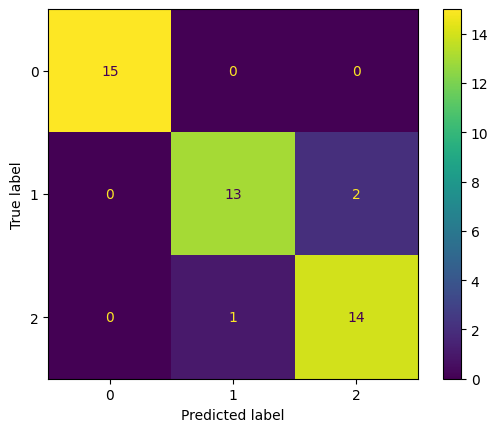

In [25]:
create_confusion_matrix(model,X_test,y_test)

In [26]:
# CREATE EXPERIMENT TO TRACK THE MODEL IN MLFLOW

import mlflow

In [27]:
def create_experiment(experiment_name,run_name,run_metrics,model,confusion_matrix_path= None,roc_auc_plot_path=None,run_params=None):

    mlflow.set_tracking_uri("sqlite:///mlflow.db")
    mlflow.set_experiment(experiment_name)

    with mlflow.start_run(run_name=run_name):

        if not run_params==None:
            for param in run_params:
                mlflow.log_param(param,run_params[param])

        for metric in run_metrics:
            mlflow.log_metric(metric,run_metrics[metric])

        
        if not confusion_matrix_path==None:
            mlflow.log_artifact(confusion_matrix_path,'Confusion_Matrix')

        if not roc_auc_plot_path==None:
            mlflow.log_artifact(roc_auc_plot_path,'roc_auc_plot')

        mlflow.set_tag("tag1",'iris_classifier')
        mlflow.set_tags({"tag2":"logistic_regression","tag3":"Multiclassification using ovr-onv vs rest class"})
        mlflow.sklearn.log_model(model,"model")

        print('Run - %s is logged to experiment - %s' % (run_name,experiment_name))
                        


In [ ]:
#START MLFLOW SERVER

#either by command: mlflow ui 

# or

# mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts --host 0.0.0.0 --port 5000

In [28]:
from datetime import datetime
experiment_name= "iris_classifier_"+str(datetime.now().strftime("%d-%m-%y"))
run_name="iris_classifier_"+str(datetime.now().strftime("%d-%m-%y"))
create_experiment(experiment_name,run_name,run_metrics,model,'ConfusionMatrix.png')

2023/04/08 14:04:55 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2023/04/08 14:04:55 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2023/04/08 14:04:55 INFO mlflow.tracking.fluent: Experiment with name 'iris_classifier_08-04-23' does not exist. Creating a new experiment.


Run - iris_classifier_08-04-23 is logged to experiment - iris_classifier_08-04-23


/home/harish/anaconda3/envs/py39/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [30]:
# PREDICT 

In [29]:
import mlflow
logged_model = 'runs:/598449a0e3364eed8b9dbde3a0eeef8b/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(X_test))

array([0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2,
       2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 1,
       1])

In [31]:
#ADDING MLFLOW Model to Model Registry

In [35]:
#Method1 : mlflow log_model() method

def create_exp_reg_model(experiment_name,run_name,run_metrics,model,confusion_matrix_path=None,roc_auc_plot_path=None,run_params=None):

    mlflow.set_tracking_uri("sqlite:///mlflow.db")
    mlflow.set_experiment(experiment_name)

    with mlflow.start_run(run_name=run_name) as run:
        if not run_params == None:
            for param in run_params:
                mlflow.log_params(param,run_params[param])

        for metric in run_metrics:
            mlflow.log_metric(metric,run_metrics[metric])

        
        if not confusion_matrix_path==None:
            mlflow.log_artifact(confusion_matrix_path,'Confusion_Matrix')

        if not roc_auc_plot_path==None:
            mlflow.log_artifact(roc_auc_plot_path,'roc_auc_plot')


        mlflow.set_tag("tag1","logreg")
        mlflow.set_tags({"tag2": "regmodel","tag3": "production"})
        mlflow.sklearn.log_model(model,"model",registered_model_name="iris_classifier")

In [36]:
experiment_name="iris_classifier_method-1"
run_name="iris_classifier_method-1"

In [39]:
create_exp_reg_model(experiment_name,run_name,run_metrics,model,'ConfusionMatrix.png')

2023/04/08 16:24:49 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2023/04/08 16:24:49 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
Successfully registered model 'iris_classifier'.
2023/04/08 16:24:49 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: iris_classifier, version 1
Created version '1' of model 'iris_classifier'.


In [40]:
#METHOD2 : mlflow register model( )

import mlflow
with mlflow.start_run(run_name=run_name) as run:
    result=mlflow.register_model(
        "runs:/598449a0e3364eed8b9dbde3a0eeef8b/model",
        "iris_classifier-2"
    )

Successfully registered model 'iris_classifier-2'.
2023/04/08 16:33:38 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: iris_classifier-2, version 1
Created version '1' of model 'iris_classifier-2'.


In [41]:
#METHOD 3: create_registered_model()

import mlflow
client = mlflow.tracking.MlflowClient()
client.create_registered_model("basic-classifier-method3")


<RegisteredModel: creation_timestamp=1680952080300, description=None, last_updated_timestamp=1680952080300, latest_versions=[], name='basic-classifier-method3', tags={}>

In [44]:
client = mlflow.tracking.MlflowClient()
result= client.create_model_version(
    name="basic-classifier-method3",
    source="598449a0e3364eed8b9dbde3a0eeef8b/artifacts/model",
    run_id="598449a0e3364eed8b9dbde3a0eeef8b"
)

2023/04/08 16:43:11 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: basic-classifier-method3, version 1


FETCHING AN MLFLOW MODEL FROM MODEL REGISTRY

In [46]:
import mlflow.pyfunc

model_name="iris_classifier"
model_version = 1

model = mlflow.pyfunc.load_model(

model_uri=f"models:/{model_name}/{model_version}"

)

y_pred=model.predict(X_test)

print(y_pred)

sklearn_model=mlflow.sklearn.load_model(

    model_uri=f"models:/{model_name}/{model_version}"

)

y_pred_prb=sklearn_model.predict_proba(X_test)

print(y_pred_prb)

[0 0 0 0 2 2 1 2 1 1 2 1 2 0 0 2 0 1 1 1 1 2 2 0 0 2 1 0 1 2 0 2 0 0 0 0 2
 2 2 1 1 2 2 1 1]
[[9.60740490e-01 3.92585123e-02 9.97718014e-07]
 [9.34942801e-01 6.50566003e-02 5.99143211e-07]
 [9.71021648e-01 2.89780934e-02 2.58630894e-07]
 [9.54908454e-01 4.50890652e-02 2.48114080e-06]
 [1.74070641e-04 1.08160301e-01 8.91665629e-01]
 [1.57978157e-05 8.13870365e-02 9.18597166e-01]
 [3.55155886e-03 7.13379272e-01 2.83069169e-01]
 [4.28623284e-04 1.90766355e-01 8.08805021e-01]
 [8.28608183e-03 8.65200953e-01 1.26512965e-01]
 [1.94227532e-02 8.41281047e-01 1.39296200e-01]
 [2.90591935e-05 4.04973046e-02 9.59473636e-01]
 [7.73702043e-03 8.63088176e-01 1.29174804e-01]
 [7.40210135e-04 3.66411887e-01 6.32847902e-01]
 [9.67717915e-01 3.22817386e-02 3.46308363e-07]
 [9.77156489e-01 2.28433143e-02 1.96485027e-07]
 [1.67586951e-07 8.48004269e-03 9.91519790e-01]
 [9.59315006e-01 4.06846383e-02 3.55531239e-07]
 [1.75295016e-03 6.28159618e-01 3.70087431e-01]
 [1.08862623e-02 7.09815481e-01 2.79298257e

TRANSITION TO NEXT STAGE 

In [2]:
import mlflow
mlflow.set_tracking_uri("sqlite:///mlflow.db")

In [3]:
client= mlflow.tracking.MlflowClient()
client.transition_model_version_stage(

    name="iris_classifier-2",
    version=1,
    stage="Production"

)

2023/04/19 22:07:04 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2023/04/19 22:07:04 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2023/04/19 22:07:04 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2023/04/19 22:07:04 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.


<ModelVersion: creation_timestamp=1680951818914, current_stage='Production', description=None, last_updated_timestamp=1681922224641, name='iris_classifier-2', run_id='598449a0e3364eed8b9dbde3a0eeef8b', run_link=None, source='/home/harish/Documents/MLops/mlruns/1/598449a0e3364eed8b9dbde3a0eeef8b/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>

PREDICT FROM PRODUCTION MODEL USING STAGE

In [50]:
import mlflow.pyfunc

model_name="iris_classifier"
stage="Production"

model=mlflow.pyfunc.load_model(

model_uri=f"models:/{model_name}/{stage}"

)

y_pred=model.predict(X_test)
print(y_pred)

[0 0 0 0 2 2 1 2 1 1 2 1 2 0 0 2 0 1 1 1 1 2 2 0 0 2 1 0 1 2 0 2 0 0 0 0 2
 2 2 1 1 2 2 1 1]


SERVING an MLFLOW MODEL FROM MODEL_REGISTRY

mlflow models serve --model-uri models:/iris_classifer/Production -p 1234 --no-conda


export MLFLOW_TRACKING_URI=sqlite:///mlflow.db for linux in the same window as mlflow models serve



Pred single record

In [4]:
import requests

inference_request={

    "dataframe_records":[[6.7,3.3,5.7,2.1]]

}

endpoint = "http://localhost:1234/invocations"

response = requests.post(endpoint,json=inference_request)

print(response.text)

{"predictions": [2]}


BATCH RECORDS

In [56]:
X_test

,sepal-length,sepal-width,petal-length,petal-width
26,5.0,3.4,1.6,0.4
41,4.5,2.3,1.3,0.3
49,5.0,3.3,1.4,0.2
44,5.1,3.8,1.9,0.4
141,6.9,3.1,5.1,2.3
108,6.7,2.5,5.8,1.8
86,6.7,3.1,4.7,1.5
142,5.8,2.7,5.1,1.9
65,6.7,3.1,4.4,1.4
61,5.9,3.0,4.2,1.5


In [58]:
lst=X_test.values.tolist()
inference_request = {

    "dataframe_records":lst
}

endpoint = "http://localhost:1234/invocations"

response=requests.post(endpoint,json=inference_request)
print(response)


<Response [200]>


In [59]:
print(response.text)

{"predictions": [0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1]}
